# Árboles de Decisión - Dataset de Depresión

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import sklearn.model_selection
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

warnings.filterwarnings('ignore')

In [ ]:
# Cargar el archivo de datos
df = pd.read_csv('depression.csv')
df.head()

Gender   Age  CGPA     Sleep Duration         Degree Suicidal Thoughts  \
0    Male  33.0  8.97          5-6 hours  Undergraduate               Yes   
1  Female  24.0  5.90          5-6 hours  Undergraduate                No   
2    Male  31.0  7.03  Less than 5 hours  Undergraduate                No   
3  Female  28.0  5.59          7-8 hours  Undergraduate               Yes   
4  Female  25.0  8.13          5-6 hours   Postgraduate               Yes   

   Work/Study Hours Family History of Mental Illness  Depression  
0               3.0                               No           1  
1               3.0                              Yes           0  
2               9.0                              Yes           0  
3               4.0                              Yes           1  
4               1.0                               No           0

# División del conjunto de datos

En esta sección se realiza la separación del conjunto de datos original (df) en dos subconjuntos: uno para el entrenamiento del modelo y otro para la evaluación (prueba) de su desempeño. Este paso es fundamental para validar la capacidad de generalización del clasificador.



Se calcula el tamaño del conjunto de datos total (N), y se define un 80% para entrenamiento (cTrain) y un 20% para prueba (cTest).

Luego, con la función train_test_split de sklearn, se divide aleatoriamente el DataFrame original (df) en dos partes:



*   train_data: contiene el 80% de los datos para entrenar el modelo.
*   test_data: contiene el 20% restante para evaluar el modelo.


Se usa random_state=123 para asegurar que la división sea reproducible (misma partición si se ejecuta el código varias veces).

Se separan las variables:

* X_train y X_test: contienen las características independientes (todas las columnas menos Depression).
* y_train y y_test: contienen la variable objetivo (Depression), es decir, la etiqueta que el modelo debe aprender a predecir.


Esta división garantiza que el modelo no vea los datos de prueba durante su entrenamiento, lo que permite medir su desempeño de forma justa y sin sesgos.

In [ ]:
from sklearn.model_selection import train_test_split
N = len(df)
cTrain = int(N * 0.8)
cTest = N - cTrain
print(f"Total: {N}, Entrenamiento: {cTrain}, Prueba: {cTest}")

train_data, test_data = sklearn.model_selection.train_test_split(
    df, train_size=cTrain, random_state=123)

X_train = train_data.drop('Depression', axis=1)
y_train = train_data['Depression']
X_test = test_data.drop('Depression', axis=1)
y_test = test_data['Depression']

Total: 27901, Entrenamiento: 22320, Prueba: 5581


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22320 entries, 27346 to 19966
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            22320 non-null  object 
 1   Age                               22320 non-null  float64
 2   CGPA                              22320 non-null  float64
 3   Sleep Duration                    22320 non-null  object 
 4   Degree                            22320 non-null  object 
 5   Suicidal Thoughts                 22320 non-null  object 
 6   Work/Study Hours                  22320 non-null  float64
 7   Family History of Mental Illness  22320 non-null  object 
 8   Depression                        22320 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 1.7+ MB


##  Preprocesamiento de los datos: escalamiento y codificación

En esta sección se implementa un proceso de **preprocesamiento estructurado** utilizando `ColumnTransformer` de Scikit-learn. Este paso es fundamental para preparar los datos antes de entrenar los modelos de machine learning.

### 🔢 Separación de características por tipo:
- **Variables numéricas:**  
  `['Age', 'CGPA', 'Work/Study Hours']`  
  Estas se escalan con `StandardScaler()` para que tengan media 0 y desviación estándar 1.

- **Variables categóricas:**  
  `['Gender', 'Sleep Duration', 'Degree', 'Suicidal Thoughts', 'Family History of Mental Illness']`  
  Estas se codifican usando `OneHotEncoder()`, lo cual convierte cada categoría en una columna binaria.

###  Construcción del pipeline

Se crea un `ColumnTransformer` llamado `full_pipeline` que:
- Aplica escalamiento a las columnas numéricas.
- Aplica codificación one-hot a las columnas categóricas.
- Ignora valores desconocidos en la codificación (gracias a `handle_unknown='ignore'`).

###  Separación de datos

Se separan los datos crudos en características (`X`) y etiquetas (`y`) para entrenamiento y prueba:

```python
X_train_raw = train_data.drop('Depression', axis=1)
y_train = train_data['Depression']
X_test_raw = test_data.drop('Depression', axis=1)
y_test = test_data['Depression']



###  Transformación final
Se transforman los conjuntos de datos con el pipeline::

```python
X_train = full_pipeline.fit_transform(X_train_raw)
X_test = full_pipeline.transform(X_test_raw)


Esto garantiza que los datos estén normalizados, codificados y listos para ser procesados por los modelos, manteniendo coherencia entre entrenamiento y prueba.



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_features = ['Age', 'CGPA', 'Work/Study Hours']
cat_features = ['Gender', 'Sleep Duration', 'Degree', 'Suicidal Thoughts', 'Family History of Mental Illness']

full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop=None, handle_unknown='ignore'), cat_features)
])

X_train_raw = train_data.drop('Depression', axis=1)
y_train = train_data['Depression']
X_test_raw = test_data.drop('Depression', axis=1)
y_test = test_data['Depression']

X_train = full_pipeline.fit_transform(X_train_raw)
X_test = full_pipeline.transform(X_test_raw)

## Árboles con Criterion = 'gini'

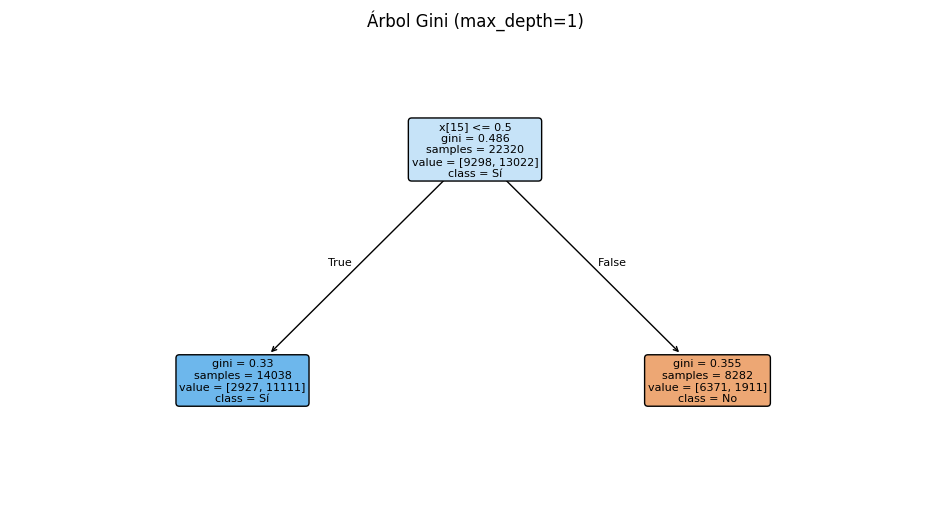

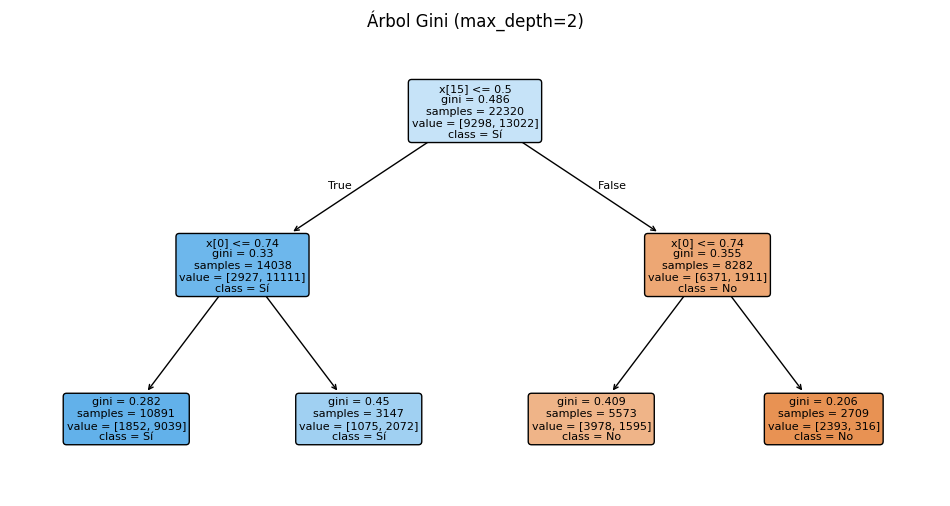

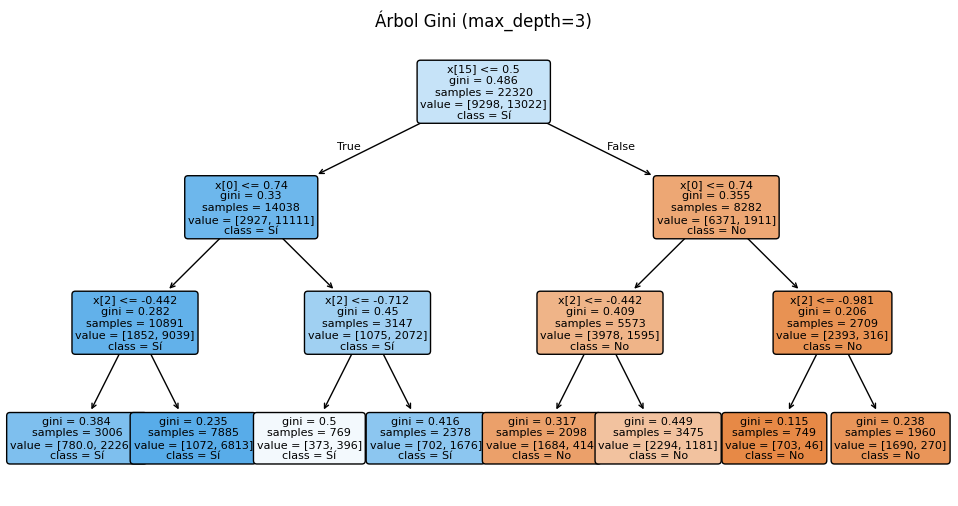

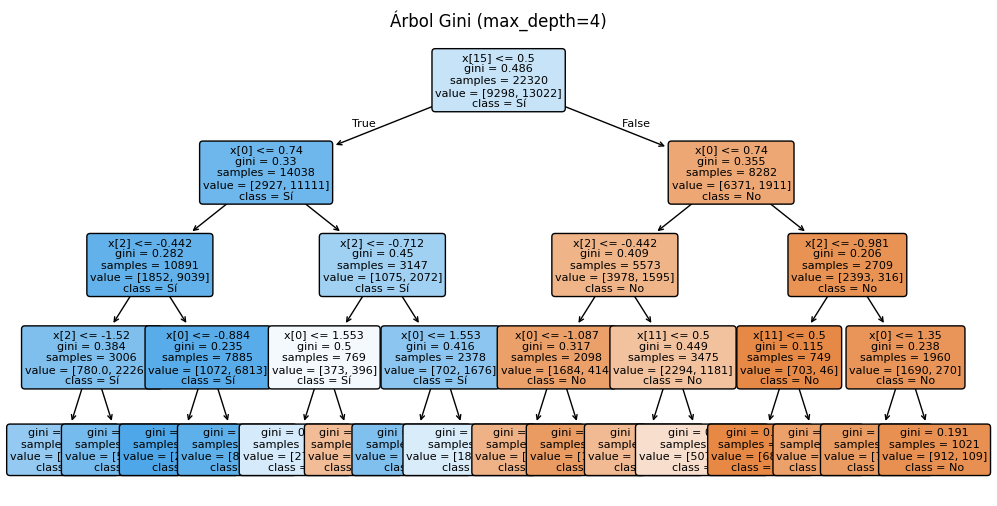

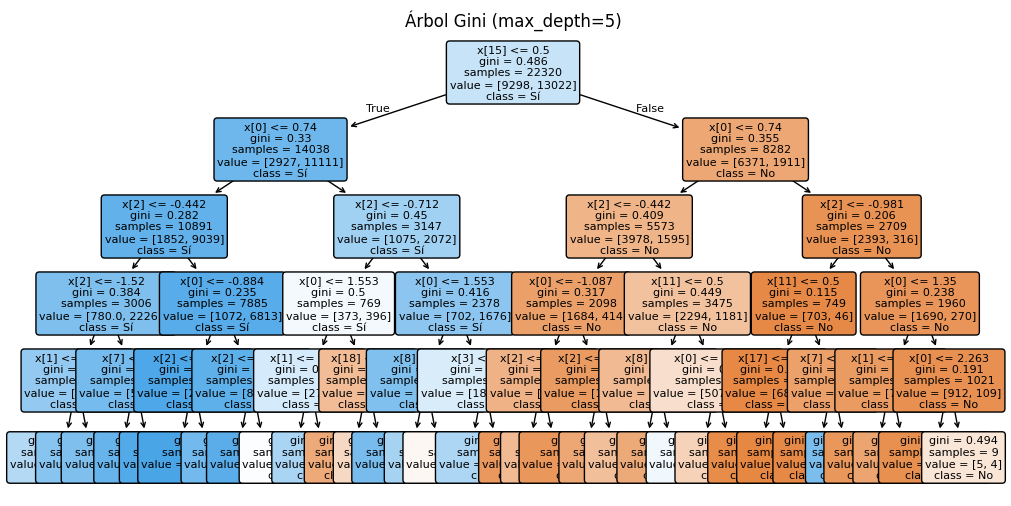

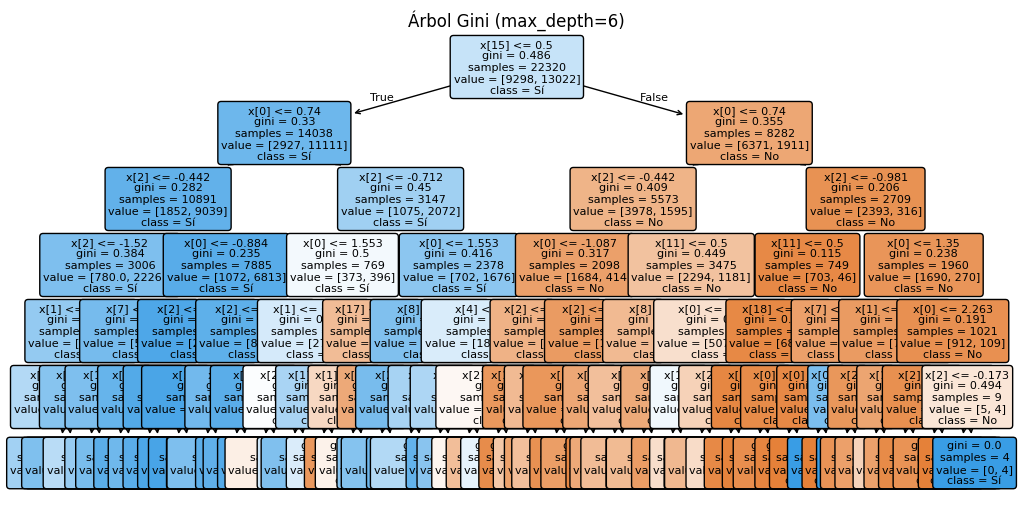

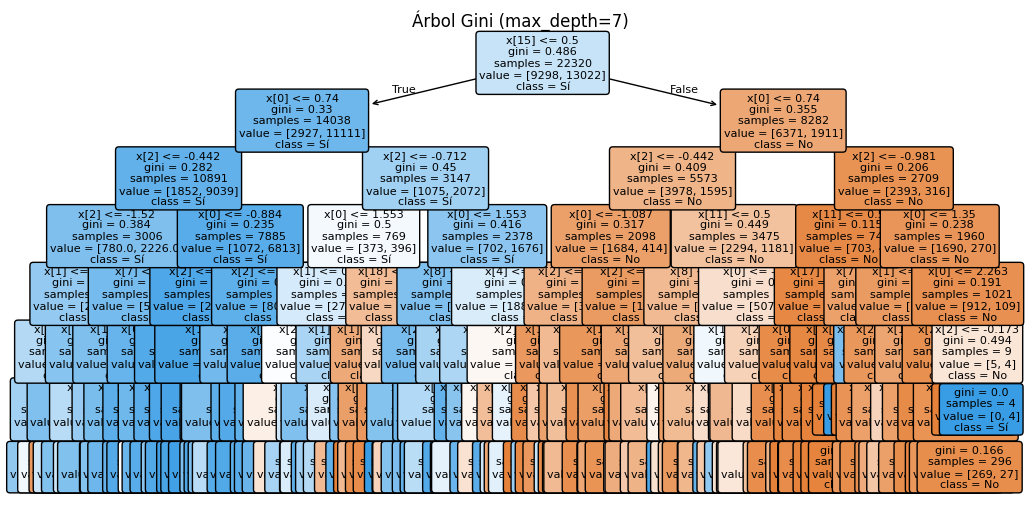

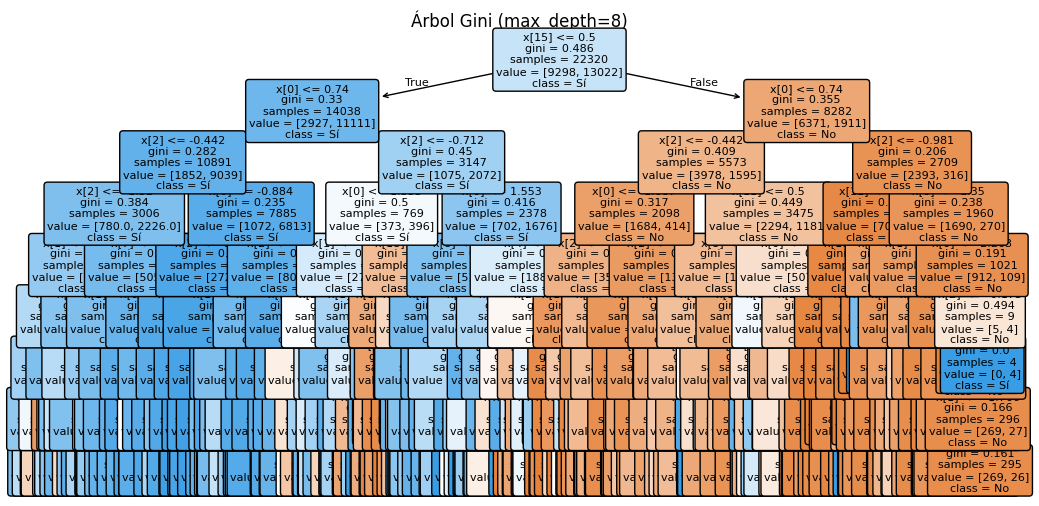

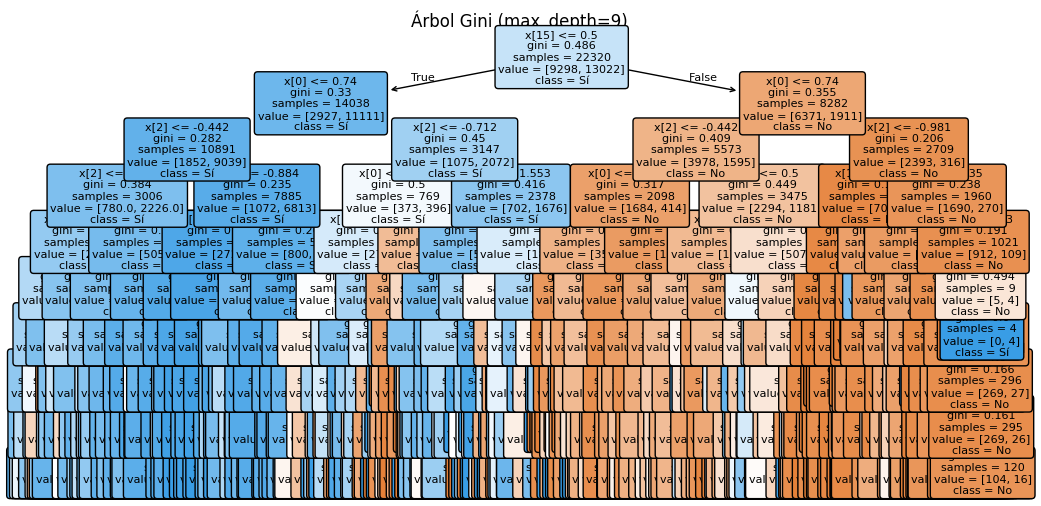

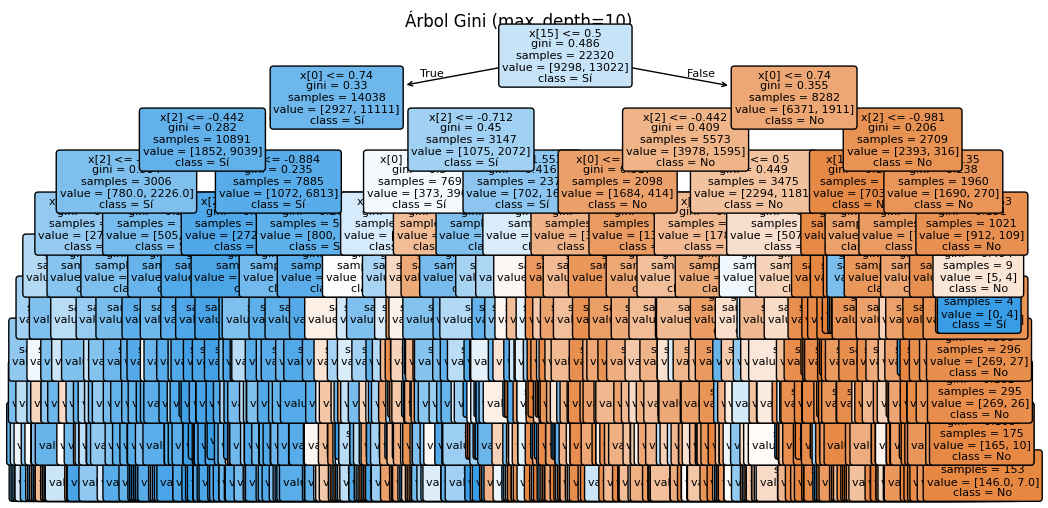

max_depth  accuracy
0          1  0.777818
1          2  0.777818
2          3  0.777818
3          4  0.781401
4          5  0.779609
5          6  0.782297
6          7  0.779072
7          8  0.778713
8          9  0.776743
9         10  0.768500

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

resultados_gini = []

for d in range(1, 11):
    modelo1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=123)
    modelo1.fit(X_train, y_train)
    pred = modelo1.predict(X_test)
    acc = accuracy_score(y_test, pred)
    resultados_gini.append({'max_depth': d, 'accuracy': acc})

    plt.figure(figsize=(12, 6))
    plot_tree(modelo1, filled=True, class_names=['No', 'Sí'], rounded=True, fontsize=8)
    plt.title(f"Árbol Gini (max_depth={d})")
    plt.show()

pd.DataFrame(resultados_gini)


##  Entrenamiento de Árboles de Decisión con criterios `gini` y `entropy`

En esta sección se entrena una serie de modelos de árbol de decisión utilizando dos criterios de impureza diferentes: **`gini`** e **`entropy`**, con el fin de comparar su rendimiento y observar cómo varía la precisión del modelo con diferentes configuraciones de hiperparámetros.



---

###  Exploración de hiperparámetros

Se evalúan combinaciones de tres hiperparámetros clave:

- `max_depth`: Profundidad máxima del árbol  
- `min_samples_split`: Mínimo número de muestras para dividir un nodo  
- `min_samples_leaf`: Mínimo número de muestras por hoja

Se prueban múltiples combinaciones para cada criterio con el siguiente código base:

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for depth in [3, 5, 10]:
    for split in [2, 10]:
        for leaf in [1, 5, 10]:
            modelo = DecisionTreeClassifier(
                criterion='entropy',  
                splitter='best',
                max_depth=depth,
                min_samples_split=split,
                min_samples_leaf=leaf,
                random_state=123
            )
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"depth={depth} | split={split} | leaf={leaf} => acc={acc:.4f}")




## Árboles con Criterion = 'entropy'

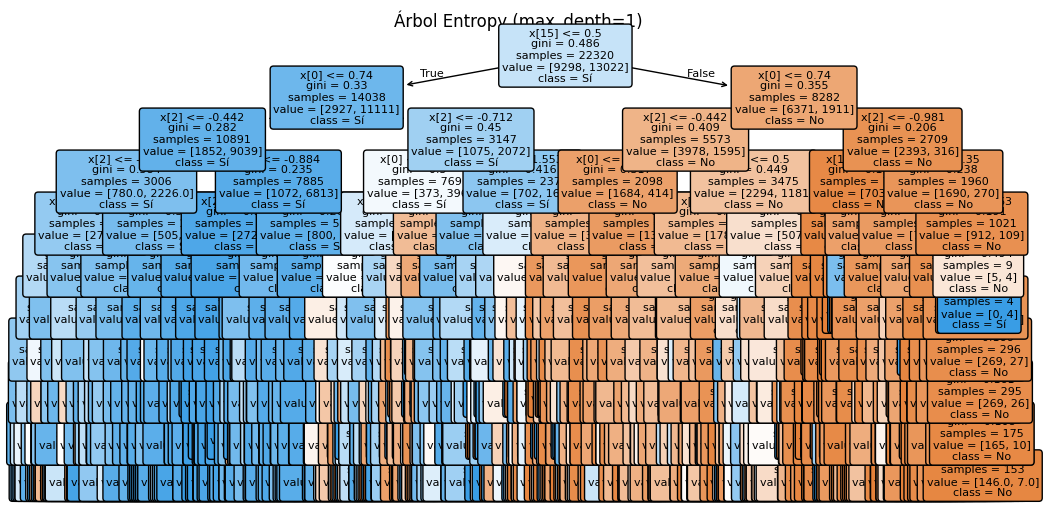

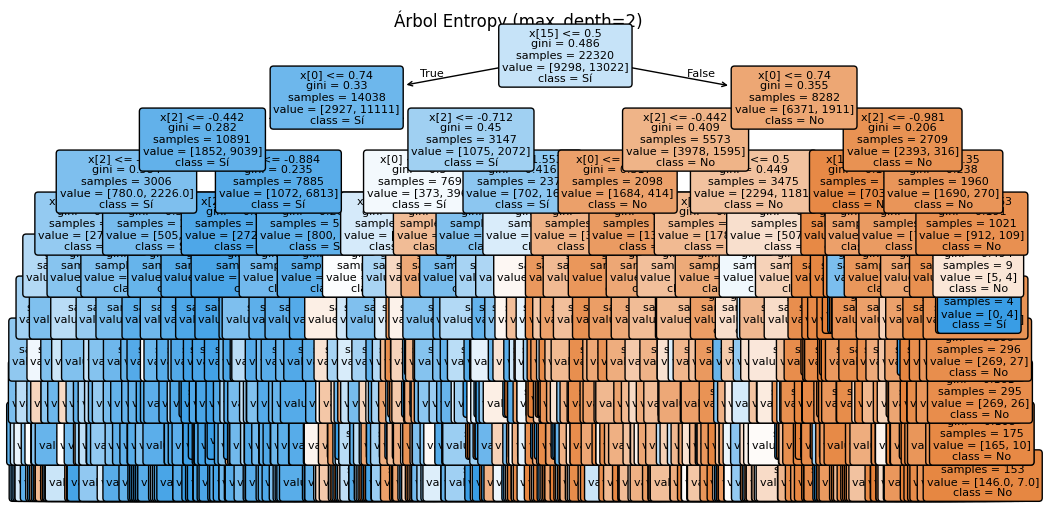

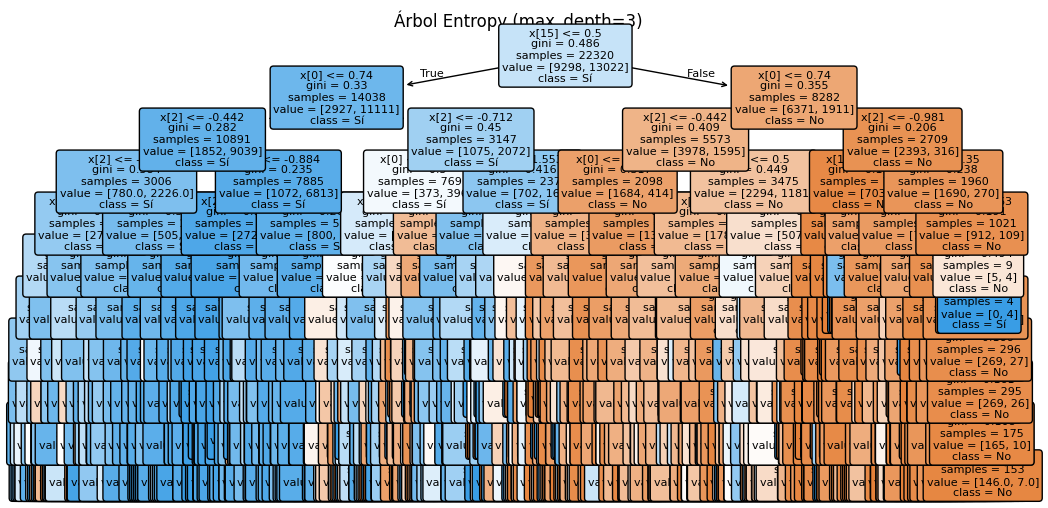

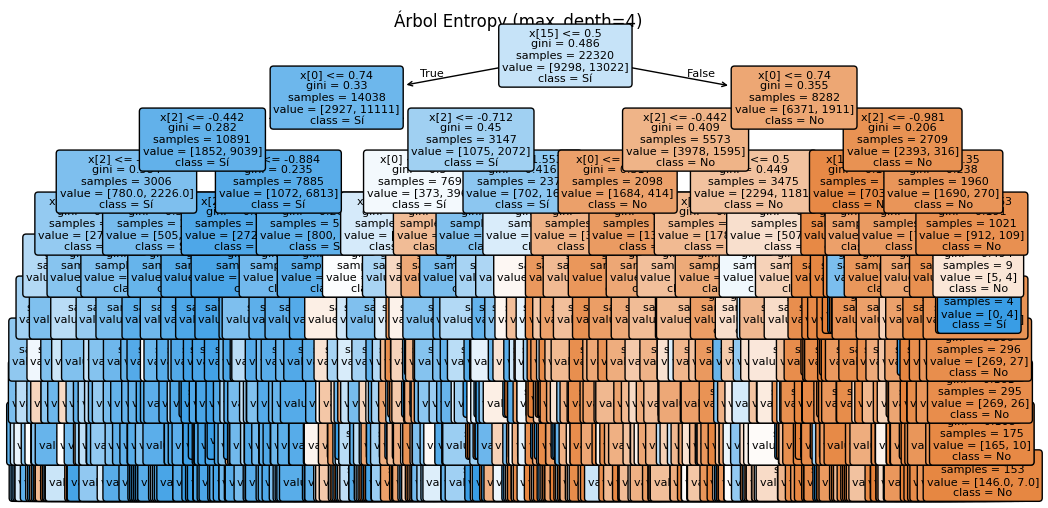

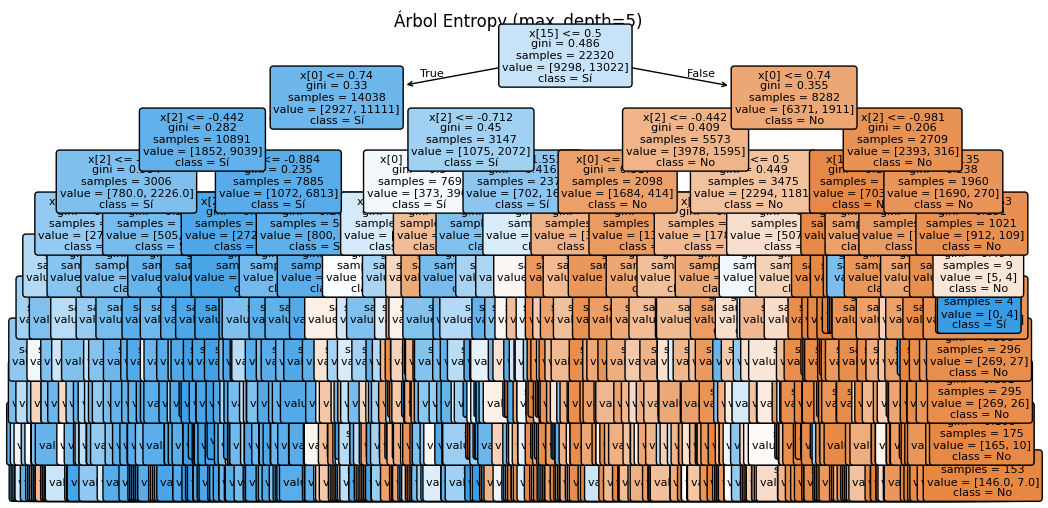

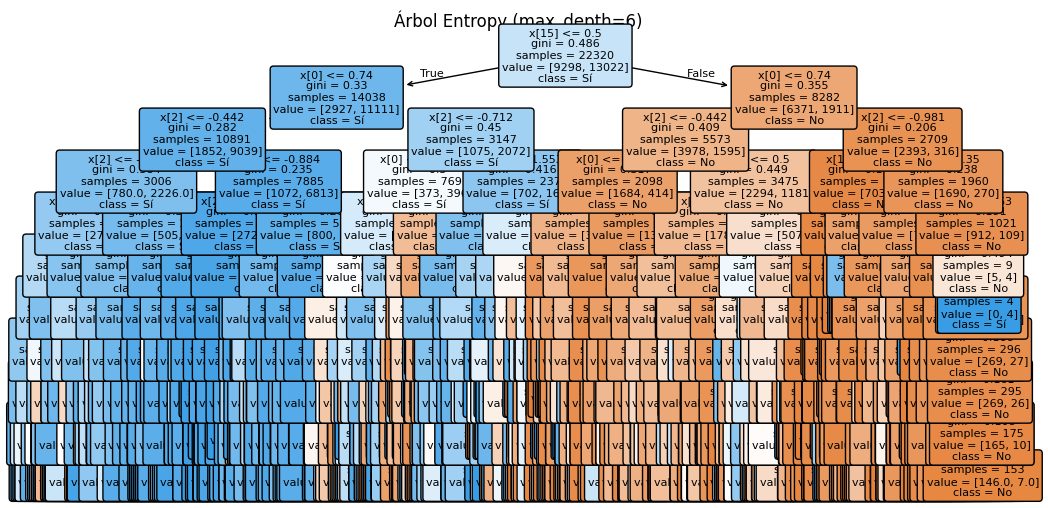

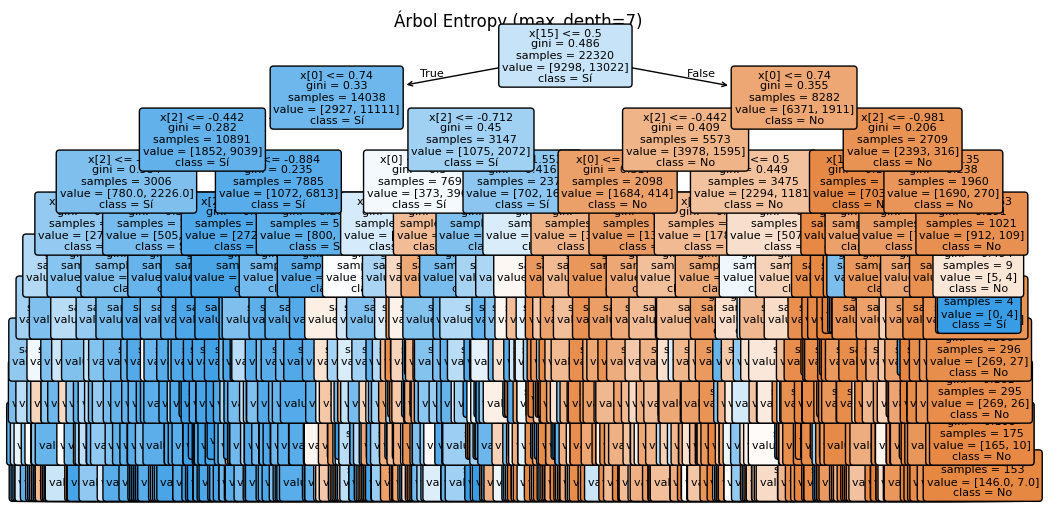

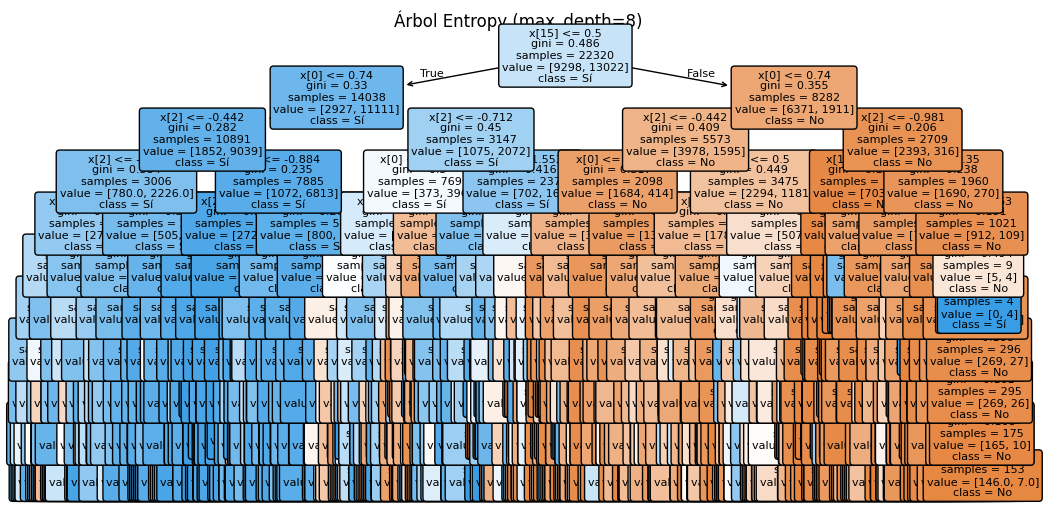

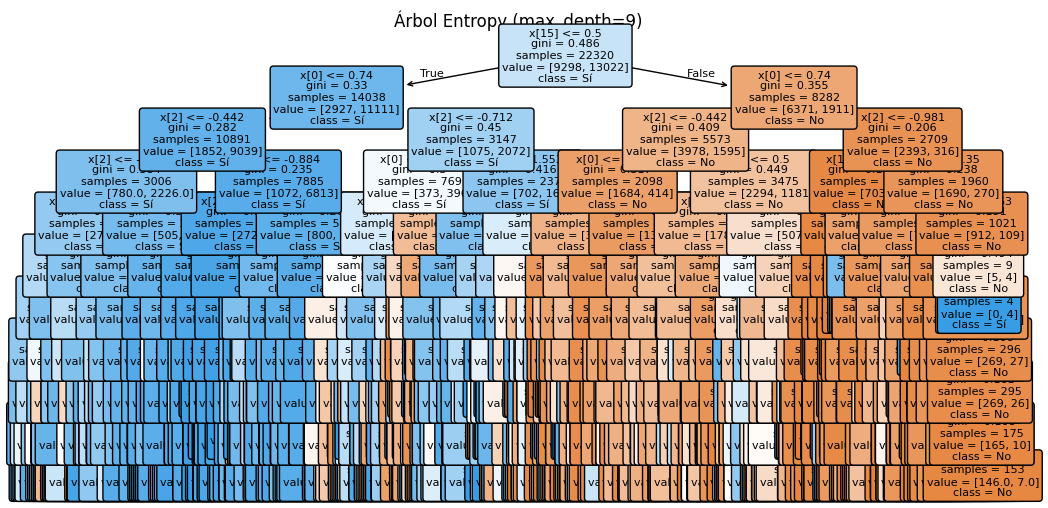

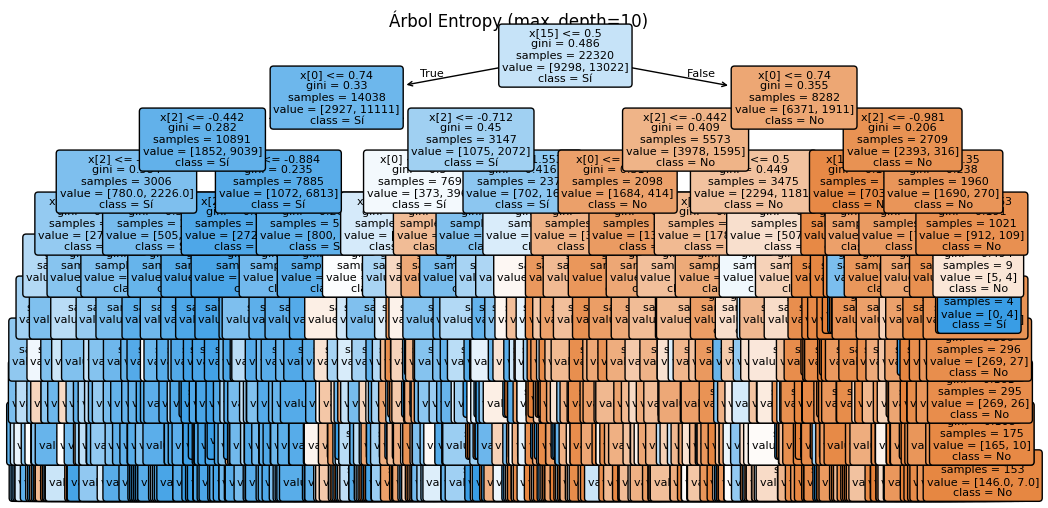

max_depth  accuracy
0          1  0.777818
1          2  0.777818
2          3  0.777818
3          4  0.781401
4          5  0.779609
5          6  0.781580
6          7  0.778534
7          8  0.776026
8          9  0.772084
9         10  0.767604

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

resultados_entropy = []

for d in range(1, 11):
    modelo2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=d, random_state=123)
    modelo2.fit(X_train, y_train)
    pred = modelo2.predict(X_test)
    acc = accuracy_score(y_test, pred)
    resultados_entropy.append({'max_depth': d, 'accuracy': acc})

    plt.figure(figsize=(12, 6))
    plot_tree(modelo1, filled=True, class_names=['No', 'Sí'], rounded=True, fontsize=8)
    plt.title(f"Árbol Entropy (max_depth={d})")
    plt.show()

pd.DataFrame(resultados_entropy)

## Variación del hiperparámetro: `min_samples_split`, `leaf` y `depth`

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for depth in [3, 5, 10]:
    for split in [2, 10]:
        for leaf in [1, 5, 10]:
            modelo = DecisionTreeClassifier(
                    criterion='entropy',
                    splitter='best',
                    max_depth=depth,
                    min_samples_split=split,
                    min_samples_leaf=leaf,
                    random_state=123

            )
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"depth={depth} | split={split} | leaf={leaf} => acc={acc:.4f}")



depth=3 | split=2 | leaf=1 => acc=0.7778
depth=3 | split=2 | leaf=5 => acc=0.7778
depth=3 | split=2 | leaf=10 => acc=0.7778
depth=3 | split=10 | leaf=1 => acc=0.7778
depth=3 | split=10 | leaf=5 => acc=0.7778
depth=3 | split=10 | leaf=10 => acc=0.7778
depth=5 | split=2 | leaf=1 => acc=0.7796
depth=5 | split=2 | leaf=5 => acc=0.7796
depth=5 | split=2 | leaf=10 => acc=0.7796
depth=5 | split=10 | leaf=1 => acc=0.7796
depth=5 | split=10 | leaf=5 => acc=0.7796
depth=5 | split=10 | leaf=10 => acc=0.7796
depth=10 | split=2 | leaf=1 => acc=0.7676
depth=10 | split=2 | leaf=5 => acc=0.7647
depth=10 | split=2 | leaf=10 => acc=0.7642
depth=10 | split=10 | leaf=1 => acc=0.7681
depth=10 | split=10 | leaf=5 => acc=0.7647
depth=10 | split=10 | leaf=10 => acc=0.7642


## 📊 Análisis comparativo de resultados de árboles de decisión

En este análisis se comparan los desempeños de árboles de decisión entrenados con diferentes criterios de impureza (`gini`, `entropy`) y con variaciones en los hiperparámetros principales (`max_depth`, `min_samples_split`, `min_samples_leaf`).

---

### 🔍 1. Árboles con `criterion='entropy'`

| max_depth | accuracy |
|-----------|----------|
| 1         | 0.7778   |
| 2         | 0.7778   |
| 3         | 0.7778   |
| 4         | 0.7814   |
| 5         | 0.7796   |
| 6         | **0.7816** ✅ |
| 7         | 0.7785   |
| 8         | 0.7760   |
| 9         | 0.7721   |
| 10        | 0.7676   |

 **Observaciones:**
- El rendimiento se mantiene estable para profundidades pequeñas (1–3).
- El valor máximo se alcanza en `max_depth=6` con una **accuracy de 0.7816**.
- A partir de profundidad 7, la precisión comienza a degradarse → posible **overfitting**.

---

###  2. Árboles con `criterion='gini'`

| max_depth | accuracy |
|-----------|----------|
| 1         | 0.7778   |
| 2         | 0.7778   |
| 3         | 0.7778   |
| 4         | 0.7814   |
| 5         | 0.7796   |
| 6         | **0.7823** ✅ |
| 7         | 0.7791   |
| 8         | 0.7787   |
| 9         | 0.7767   |
| 10        | 0.7685   |

 **Observaciones:**
- El comportamiento es muy similar al de `entropy`.
- La mejor precisión se obtuvo en `max_depth=6` con una **accuracy de 0.7823**.
- Igual que con `entropy`, hay señales de overfitting en profundidades más altas.

---

###  3. Árboles con variaciones de hiperparámetros (`depth`, `split`, `leaf`)

| max_depth | min_samples_split | min_samples_leaf | accuracy |
|-----------|-------------------|------------------|----------|
| 3         | 2 o 10            | 1, 5, 10         | 0.7778   |
| 5         | 2 o 10            | 1, 5, 10         | **0.7796** ✅ |
| 10        | 2 o 10            | 1, 5, 10         | 0.7642–0.7681 |

**Observaciones:**
- Las combinaciones con `depth=3` se mantuvieron constantes en 0.7778.
- Las combinaciones con `depth=5` ofrecieron la mejor precisión constante (0.7796).
- Las configuraciones con `depth=10` mostraron **baja precisión y mayor variación**, reflejando probable **sobreajuste**.

---

### ✅ Conclusión general

- **La profundidad del árbol (`max_depth`) es el hiperparámetro con mayor impacto** sobre la precisión.
- Ambos criterios (`gini` y `entropy`) tuvieron comportamientos similares, pero `gini` alcanzó la mejor precisión (0.7823).
- El ajuste de `min_samples_split` y `min_samples_leaf` **no mejoró significativamente** la precisión, pero permitió **estabilizar el rendimiento**, especialmente evitando sobreajuste en modelos más profundos.




##  Árbol con mejor rendimiento y conclusiones

### ✅ Mejor resultado obtenido

El modelo que alcanzó la mayor precisión fue:

- **Modelo:** Árbol de Decisión con criterio `gini`
- **Hiperparámetro clave:** `max_depth = 6`
- **Accuracy:** **0.7823**

Este resultado es **ligeramente superior** al mejor obtenido con `entropy` (`0.7816`) y supera todas las combinaciones realizadas con variación de `split` y `leaf`.

---

### Análisis de los resultados

#### 1. Importancia de `max_depth`
- Se observó que el parámetro más determinante fue la profundidad máxima del árbol (`max_depth`).
- Profundidades muy bajas (1–3) limitaron el aprendizaje.
- Profundidades muy altas (9–10) redujeron la precisión por **sobreajuste**.
- La mejor profundidad fue **6**, donde se alcanzó el **punto óptimo de generalización**.

#### 2. Comparación entre `gini` y `entropy`
- Ambos criterios entregaron **resultados muy similares**.
- `gini` logró la mayor precisión (0.7823), siendo además **más eficiente computacionalmente**.
- Esto sugiere que `gini` es una **opción preferible** para este tipo de problema.

#### 3. Impacto de otros hiperparámetros (`min_samples_split` y `min_samples_leaf`)
- Las variaciones de estos parámetros **no mejoraron la precisión significativamente**.
- Sin embargo, ayudaron a **estabilizar el modelo** frente a sobreajuste, especialmente en árboles con `max_depth=10`.
- En general, el desempeño fue **constante** para `depth=5` y **empeoró para `depth=10`**, sin importar los valores de `split` y `leaf`.

---

### Conclusión final

El mejor árbol de decisión fue el que usó:

```python
DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    random_state=123
)







Este modelo logró el mejor equilibrio entre complejidad y capacidad de generalización, demostrando que:

No siempre los árboles más profundos son mejores.

El ajuste fino de hiperparámetros es clave para evitar sobreajuste.

El criterio gini, al ser más ligero, es una excelente opción cuando ofrece resultados similares o mejores que entropy.



---

Reporte de clasificación:
              precision    recall  f1-score   support

No Depresión       0.73      0.66      0.70      2267
Sí Depresión       0.78      0.83      0.81      3314

    accuracy                           0.76      5581
   macro avg       0.76      0.75      0.75      5581
weighted avg       0.76      0.76      0.76      5581



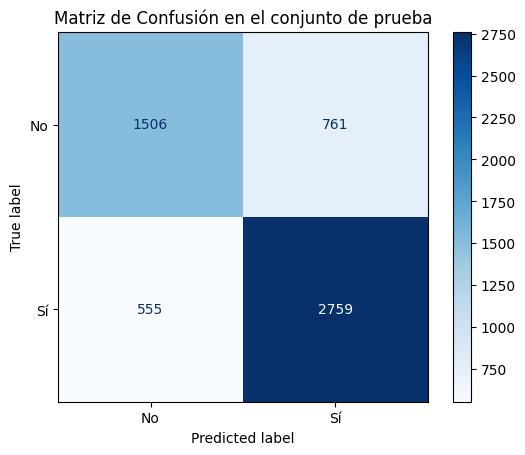

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Ya entrenado tu modelo con X_train e y_train...
y_pred = modelo.predict(X_test)

# Informe de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["No Depresión", "Sí Depresión"]))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Sí"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión en el conjunto de prueba")
plt.show()


# Informe de Desempeño del Clasificador de Depresión

Se evaluó un árbol de decisión utilizando el criterio entropy con hiperparámetros seleccionados manualmente. A continuación, se presentan los resultados clave:

Métricas generales
Accuracy general: 76%

Precisión (clase 'Sí Depresión'): 78%

Recall (clase 'Sí Depresión'): 83%

F1-score (clase 'Sí Depresión'): 81%

Estas métricas indican que el modelo tiene un buen desempeño identificando correctamente los casos reales de depresión (recall), aunque aún comete falsos positivos (personas sin depresión clasificadas como si la tuvieran).

# Análisis de la Matriz de confusión
Análisis de la Matriz de Confusión

Falsos Positivos (FP): 761 personas sin depresión clasificadas como si la tuvieran.
Falsos Negativos (FN): 555 personas con depresión que no fueron detectadas por el modelo.

# Conclusiones



*   El modelo identifica correctamente la mayoría de personas con depresión.
*   Puede ser útil en un entorno donde es preferible detectar más casos verdaderos aunque se incluyan algunos falsos positivos.
*   Se recomienda mejorar la precisión para reducir las alertas innecesarias (FP).








